# Capstone project

**This note book is mainly used for the Capstone Project**

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("Data-Collisions.csv")
print("Database loaded successfully!")

Database loaded successfully!


/home/wg/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Find NaN columns

(194673, 38)
Columns and numver of NaN: X                   5334
Y                   5334
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
COLLISIONTYPE       4904
JUNCTIONTYPE        6329
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
dtype: int64


Text(0.5, 0, 'Column name')

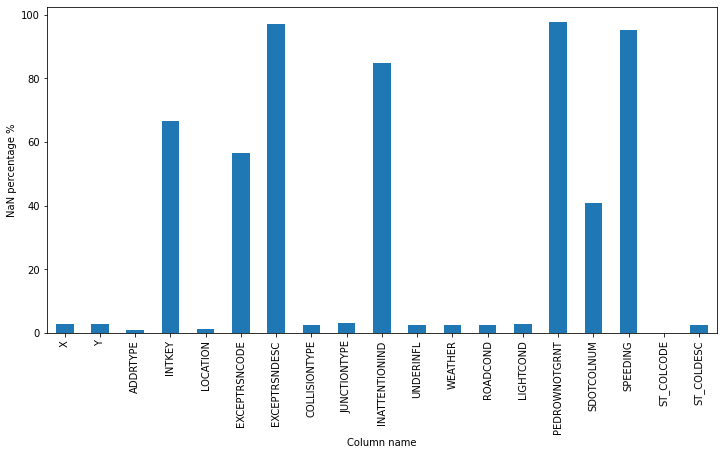

In [3]:
import matplotlib.pylab as plt
import seaborn as sns
# print(df.info())
# print(df["ROADCOND"].isnull().sum())

#==========
# find columns with NaN
print(df.shape)
columns_with_nan = df.columns[df.isnull().any()].tolist()
num_of_na = df[columns_with_nan].isnull().sum()
print("Columns and numver of NaN:", num_of_na)
na_percentage = num_of_na/df.shape[0]*100
plt.figure(figsize=[12,6])
na_percentage.plot.bar()
plt.ylabel("NaN percentage %")
plt.xlabel("Column name")

### Drop columns with NaN > 30%

In [4]:
columns_tobe_cleaned = df.columns[df.isnull().sum()/df.shape[0] > 0.3].tolist() #columns with >30% NAN
print("Columns with >30% NaN:", columns_tobe_cleaned)

Columns with >30% NaN: ['INTKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING']


### Object type columns 

In [56]:
print(df.info())
object_types = ["ADDRTYPE", "SEVERITYDESC", "STATUS", \
                "COLLISIONTYPE", "JUNCTIONTYPE", "SDOT_COLDESC", "INATTENTIONIND", "UNDERINFL", \
               "WEATHER", "ROADCOND", "LIGHTCOND", "PEDROWNOTGRNT", "SPEEDING", \
               "ST_COLCODE", "ST_COLDESC", "HITPARKEDCAR"]
# for ind in object_types:
#     print("Index: ", ind)
#     print(df[ind].value_counts())
# #     plt.figure()
#     sns.catplot(y=ind, kind="count", data=df)
#     plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

### Numeric type columns

In [57]:
number_types = ["SEVERITYCODE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "SDOT_COLCODE", \
                "SDOTCOLNUM", "SEGLANEKEY"]
# for ind in number_types:
#     print("Column is: ", ind)
#     print(df[ind].value_counts())
# #     plt.figure()
# #     sns.distplot(df[ind], kde=False)
# #     plt.show()

### Analysis to drop other un-related columns

['INTKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'X', 'Y', 'INCKEY', 'OBJECTID', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 'SEVERITYCODE.1', 'SEVERITYDESC', 'SDOT_COLDESC', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'INCDATE', 'INCDTTM', 'UNDERINFL', 'SPEEDING', 'PEDCYLCOUNT', 'PEDCYLCOUNT', 'WEATHER', 'PERSONCOUNT', 'JUNCTIONTYPE', 'HITPARKEDCAR']


<Figure size 432x288 with 0 Axes>

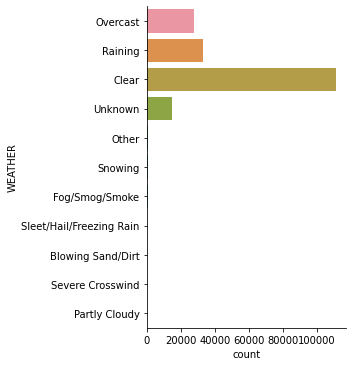

<Figure size 432x288 with 0 Axes>

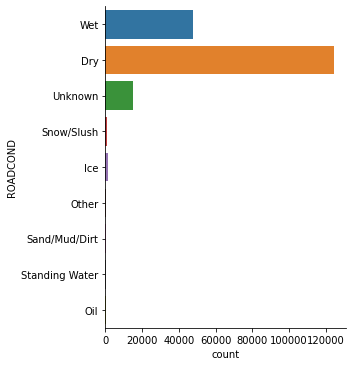

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Test weather
plt.figure()
sns.catplot(y="WEATHER", kind="count", data = df) #drop, this will be reflected on road condition

plt.figure()
sns.catplot(y="ROADCOND", kind="count", data=df)

columns_tobe_cleaned += ["X", "Y", "INCKEY", "OBJECTID", "COLDETKEY", "REPORTNO",\
                         "STATUS", "INTKEY", "LOCATION", "SEVERITYCODE.1", \
                         "SEVERITYDESC", "SDOT_COLDESC", "ST_COLDESC", \
                         "SEGLANEKEY", "CROSSWALKKEY", "INCDATE", \
                         "INCDTTM", "UNDERINFL", "SPEEDING", "PEDCYLCOUNT","PEDCYLCOUNT", "WEATHER", \
                         "PERSONCOUNT", "JUNCTIONTYPE", "HITPARKEDCAR"]

print(columns_tobe_cleaned)

### Initial data drop

In [8]:
df_cleaned = df.drop(labels = columns_tobe_cleaned, axis=1)
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SEVERITYCODE   194673 non-null  int64 
 1   ADDRTYPE       192747 non-null  object
 2   COLLISIONTYPE  189769 non-null  object
 3   PEDCOUNT       194673 non-null  int64 
 4   VEHCOUNT       194673 non-null  int64 
 5   SDOT_COLCODE   194673 non-null  int64 
 6   ROADCOND       189661 non-null  object
 7   LIGHTCOND      189503 non-null  object
 8   ST_COLCODE     194655 non-null  object
dtypes: int64(4), object(5)
memory usage: 13.4+ MB
None


### Test address type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SEVERITYCODE   194673 non-null  int64 
 1   ADDRTYPE       192747 non-null  object
 2   COLLISIONTYPE  189769 non-null  object
 3   PEDCOUNT       194673 non-null  int64 
 4   VEHCOUNT       194673 non-null  int64 
 5   SDOT_COLCODE   194673 non-null  int64 
 6   ROADCOND       189661 non-null  object
 7   LIGHTCOND      189503 non-null  object
 8   ST_COLCODE     194655 non-null  object
dtypes: int64(4), object(5)
memory usage: 13.4+ MB
None
(194673, 9)


<Figure size 432x288 with 0 Axes>

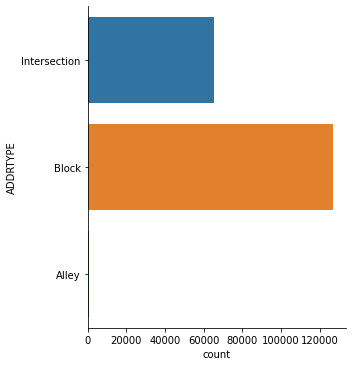

In [9]:
print(df_cleaned.info())
print(df_cleaned.shape)
further_drop = ["INCKEY", "JUNCTIONTYPE"]

# Test Address type
plt.figure()
sns.catplot(y="ADDRTYPE", kind="count", data=df_cleaned)

### Test vehicle count


<AxesSubplot:xlabel='VEHCOUNT'>

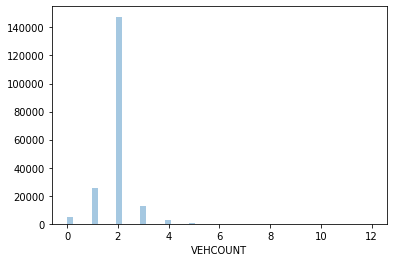

In [10]:
# Test vehicle count
plt.figure()
sns.distplot(df_cleaned["VEHCOUNT"], kde=False) # keep this one

### Test SDOT_COLCODE

/home/wg/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


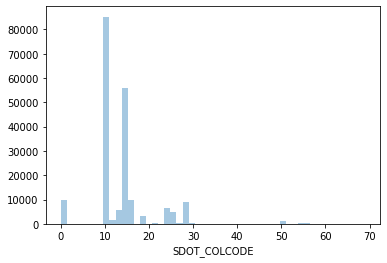

<Figure size 432x288 with 0 Axes>

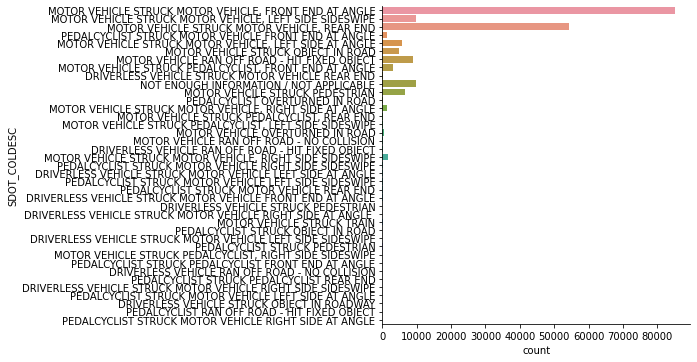

In [11]:

# Tests of SDOT_COLCODE
plt.figure()
sns.distplot(df_cleaned["SDOT_COLCODE"],  kde=False) # keep this one. eg. MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END
plt.figure()
sns.catplot(y="SDOT_COLDESC", kind="count", data=df) # drop this one

### Test light condition

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


<Figure size 432x288 with 0 Axes>

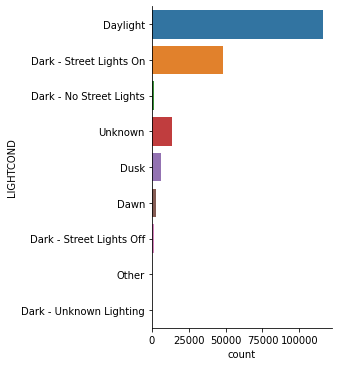

In [12]:
# Test LIGHTCOND
plt.figure()
sns.catplot(y="LIGHTCOND", kind="count", data=df_cleaned)
print(df_cleaned["LIGHTCOND"].value_counts())


### Data orgnisation

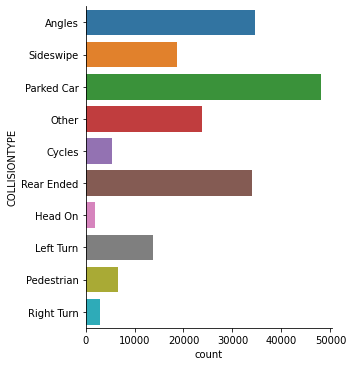

In [13]:
#collision type
sns.catplot(y="COLLISIONTYPE", kind="count", data=df_cleaned) # very complicated and drop it
df_cleaned.drop(labels = ["COLLISIONTYPE"], axis=1, inplace=True)

<ipython-input-14-b0da4d1bd13f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speeding_yes_no[pd.isnull(speeding_yes_no)] = "N"


<AxesSubplot:xlabel='SPEEDING_YES_NO'>

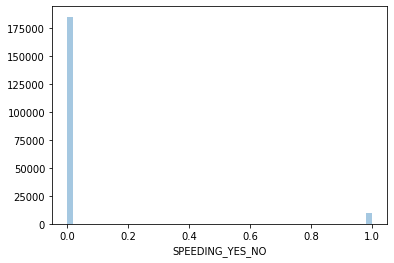

In [14]:
# add speeding to df_cleaned
#print(df["SPEEDING"].value_counts())
speeding_yes_no = df["SPEEDING"]
speeding_yes_no[pd.isnull(speeding_yes_no)] = "N"
df_cleaned["SPEEDING_YES_NO"] = speeding_yes_no
df_cleaned["SPEEDING_YES_NO"].replace(["Y", "N"], [1,0], inplace=True)
sns.distplot(df_cleaned["SPEEDING_YES_NO"], kde=False)

In [15]:
# # Address type
df_cleaned["ADDRTYPE"].fillna("Block", inplace=True)
df_cleaned["ADDRTYPE"].replace("Alley", "Block", inplace=True) # replace Alley with Block to simplify the attributes.
address_type = pd.get_dummies(df_cleaned["ADDRTYPE"]) #keep this one
df_cleaned = pd.concat([df_cleaned, address_type], axis=1)
df_cleaned.drop(labels = ["ADDRTYPE"], axis=1, inplace=True)

In [16]:
# road condition
df_cleaned["ROADCOND"].fillna("Unknown", inplace=True)
dry_group = ["Unknown", "Other", "Sand/Mud/Dirt"]
wet_group = ["Ice", "Snow/Slush", "Standing Water", "Oil"]
for dd in dry_group:
    df_cleaned["ROADCOND"].replace(dd, "Dry",inplace=True)
for ww in wet_group:
    df_cleaned["ROADCOND"].replace(ww, "Wet",inplace=True)
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned["ROADCOND"])], axis=1)
df_cleaned.drop(labels = ["ROADCOND"], axis=1, inplace=True)

In [17]:
# light condition
df_cleaned["LIGHTCOND"].fillna("Unknown", inplace=True)
day_light = ["Daylight", "Unknown", "Dusk", "Dawn", "Other"]
night_light = ["Dark - Street Lights On", "Dark - No Street Lights", \
        "Dark - Street Lights Off", "Dark - Unknown Lighting"]
for bb in day_light:
    df_cleaned["LIGHTCOND"].replace(bb, "Bright", inplace=True)
for nn in night_light:
    df_cleaned["LIGHTCOND"].replace(nn, "Dark", inplace=True)
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df_cleaned["LIGHTCOND"])], axis=1)
df_cleaned.drop(labels = ["LIGHTCOND"], axis=1, inplace=True)

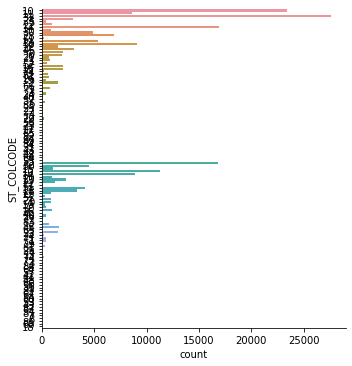

In [18]:
sns.catplot(y="ST_COLCODE", kind="count", data=df_cleaned)
df_cleaned.drop(labels=["ST_COLCODE"], axis=1, inplace=True)

In [19]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   SEVERITYCODE     194673 non-null  int64
 1   PEDCOUNT         194673 non-null  int64
 2   VEHCOUNT         194673 non-null  int64
 3   SDOT_COLCODE     194673 non-null  int64
 4   SPEEDING_YES_NO  194673 non-null  int64
 5   Block            194673 non-null  uint8
 6   Intersection     194673 non-null  uint8
 7   Dry              194673 non-null  uint8
 8   Wet              194673 non-null  uint8
 9   Bright           194673 non-null  uint8
 10  Dark             194673 non-null  uint8
dtypes: int64(5), uint8(6)
memory usage: 8.5 MB
None


In [24]:
print(df_cleaned.head())

   SEVERITYCODE  PEDCOUNT  VEHCOUNT  SDOT_COLCODE  SPEEDING_YES_NO  Block  \
0             2         0         2            11                0      0   
1             1         0         2            16                0      1   
2             1         0         3            14                0      1   
3             1         0         3            11                0      1   
4             2         0         2            11                0      0   

   Intersection  Dry  Wet  Bright  Dark  
0             1    0    1       1     0  
1             0    0    1       0     1  
2             0    1    0       1     0  
3             0    1    0       1     0  
4             1    0    1       1     0  


<AxesSubplot:xlabel='SEVERITYCODE'>

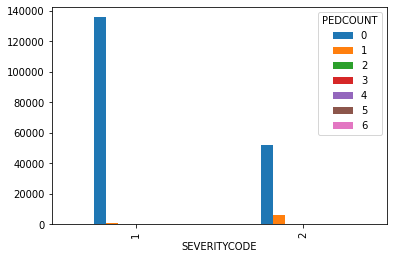

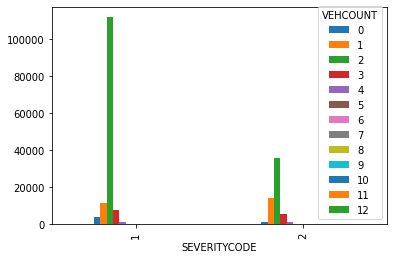

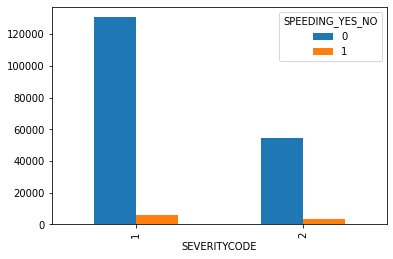

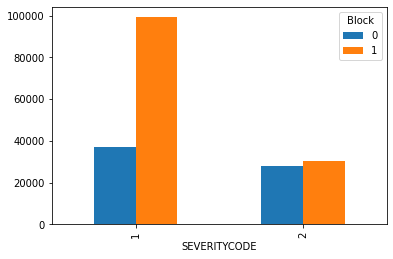

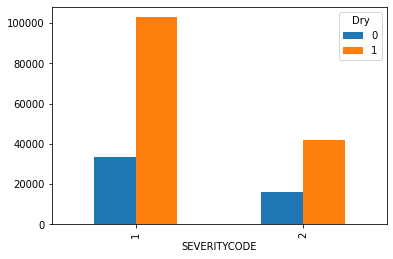

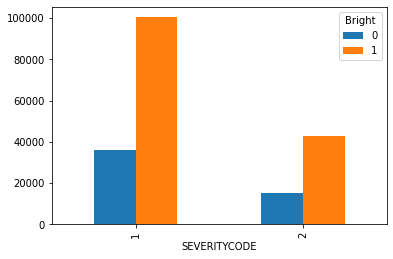

In [20]:
df_cleaned.groupby(by="SEVERITYCODE").PEDCOUNT.value_counts().unstack().plot.bar()
df_cleaned.groupby(by="SEVERITYCODE").VEHCOUNT.value_counts().unstack().plot.bar()
df_cleaned.groupby(by="SEVERITYCODE").SPEEDING_YES_NO.value_counts().unstack().plot.bar()
df_cleaned.groupby(by="SEVERITYCODE").Block.value_counts().unstack().plot.bar()
df_cleaned.groupby(by="SEVERITYCODE").Dry.value_counts().unstack().plot.bar()
df_cleaned.groupby(by="SEVERITYCODE").Bright.value_counts().unstack().plot.bar()

## Modelling

### split fitting and testing data

In [21]:
df_cleaned.drop(labels=["Intersection", "Dry", "Bright"], axis=1, inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   SEVERITYCODE     194673 non-null  int64
 1   PEDCOUNT         194673 non-null  int64
 2   VEHCOUNT         194673 non-null  int64
 3   SDOT_COLCODE     194673 non-null  int64
 4   SPEEDING_YES_NO  194673 non-null  int64
 5   Block            194673 non-null  uint8
 6   Wet              194673 non-null  uint8
 7   Dark             194673 non-null  uint8
dtypes: int64(5), uint8(3)
memory usage: 8.0 MB


In [22]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df_cleaned[['PEDCOUNT', 'VEHCOUNT','SDOT_COLCODE', 'SPEEDING_YES_NO', 'Block', 'Wet', 'Dark']] .values  #.astype(float)
y = df_cleaned['SEVERITYCODE'].values
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 7) (155738,)
Test set: (38935, 7) (38935,)


### KNN model and evaluation

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

testing 1 neight
testing 2 neight
testing 3 neight
testing 4 neight
testing 5 neight
testing 6 neight
testing 7 neight
testing 8 neight
testing 9 neight


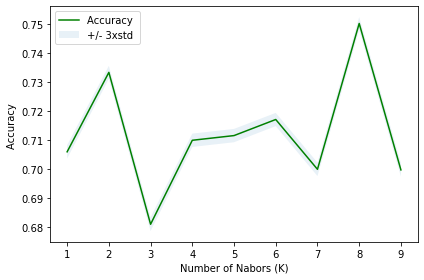

In [85]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    print("testing %d neight" %n)
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [25]:
ks = 8
knn_model = KNeighborsClassifier(n_neighbors = ks).fit(X_train,y_train)

### Decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### SVM

In [27]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train,y_train)

SVC()

### Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

## Model evaluation 

In [30]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

knn_yhat = knn_model.predict(X_test)
print("KNN Jacccard: %0.2f" %jaccard_score(y_test, knn_yhat))
print("KNN F1-score: %0.2f" %f1_score(y_test, knn_yhat, average='weighted'))

dt_yhat = dt_model.predict(X_test)
print("Decision Tree Jacccard: %0.2f" %jaccard_score(y_test, dt_yhat))
print("Decision Tree F1-score: %0.2f" %f1_score(y_test, dt_yhat, average='weighted'))

svm_yhat = svm_model.predict(X_test)
print("Support Vector Machine Jacccard: %0.2f" %jaccard_score(y_test, svm_yhat))
print("Support Vector Machine F1-score: %0.2f" %f1_score(y_test, svm_yhat, average='weighted'))

LR_yhat = LR_model.predict(X_test)
print("Logistic Regression Jacccard: %0.2f" %jaccard_score(y_test, LR_yhat))
print("Logistic Regression F1-score: %0.2f" %f1_score(y_test, LR_yhat, average='weighted'))
yhat_prob = LR_model.predict_proba(X_test)
print("Log loss: %0.2f" %log_loss(y_test, yhat_prob))

KNN Jacccard: 0.73
KNN F1-score: 0.70
Decision Tree Jacccard: 0.73
Decision Tree F1-score: 0.68
Support Vector Machine Jacccard: 0.74
Support Vector Machine F1-score: 0.70
Logistic Regression Jacccard: 0.72
Logistic Regression F1-score: 0.67
Log loss: 0.55


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [41]:
svm_yhat = svm_model.predict(X_test)

In [42]:
print(svm_yhat.shape)
print(y_test.shape)

(38935,)
(38935,)


              precision    recall  f1-score   support

           1       0.75      0.98      0.85     27425
           2       0.80      0.22      0.35     11510

    accuracy                           0.75     38935
   macro avg       0.78      0.60      0.60     38935
weighted avg       0.76      0.75      0.70     38935

Confusion matrix, without normalization
[[26802   623]
 [ 8980  2530]]


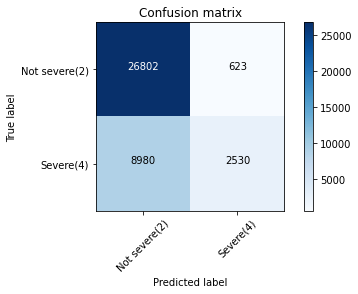

In [55]:
cnf_matrix = confusion_matrix(y_test, svm_yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, svm_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not severe(2)','Severe(4)'],normalize= False,  title='Confusion matrix')

## Discussion

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64


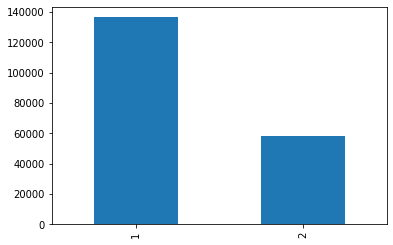

In [50]:
df_cleaned["SEVERITYCODE"].value_counts().plot(kind="bar")
print(df_cleaned["SEVERITYCODE"].value_counts())